In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import soundfile as sf
import librosa

# Load the audio file
import_file = r"C:\Users\ASUS\Downloads\WhatsApp Audio 2024-05-09 at 23.01.21_22255292.dat (online-audio-converter.com).wav"
y, sr = librosa.load(import_file)
print("ndarray:", y)
print("Sample rate:", sr)
sample_rate = sr

# Plot the original signal
time_axis = np.arange(len(y)) / sample_rate
plt.figure(figsize=(10, 6))
plt.plot(time_axis, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12260\767424599.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(import_file)
c:\Users\ASUS\anaconda3\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\WhatsApp Audio 2024-05-09 at 23.01.21_22255292.dat (online-audio-converter.com).wav'

Estimated noise threshold: 0.008505834499393657


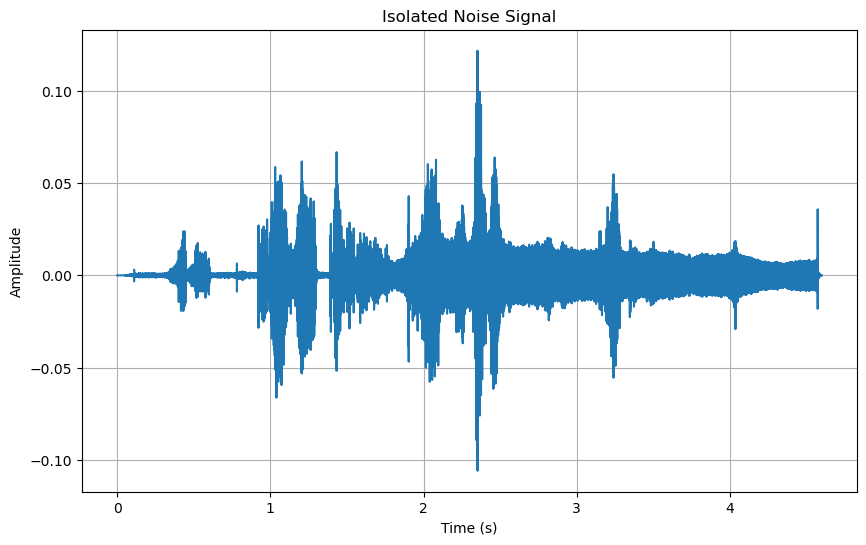

In [ ]:
# Define a high-pass filter to isolate noise
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply high-pass filter to isolate high-frequency noise
cutoff_freq = 4000  # Cutoff frequency for the high-pass filter
filtered_noise = highpass_filter(y, cutoff_freq, sample_rate, order=4)

# Compute the RMS of the filtered noise to estimate the noise threshold
noise_threshold = np.sqrt(np.mean(filtered_noise**2))
print(f'Estimated noise threshold: {noise_threshold}')

# Plot the isolated noise signal
plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Isolated Noise Signal')
plt.grid(True)
plt.show()

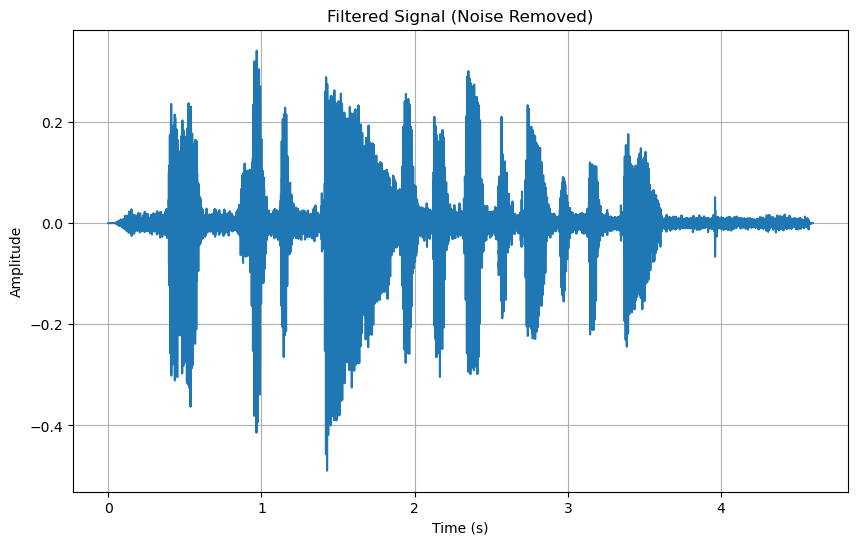

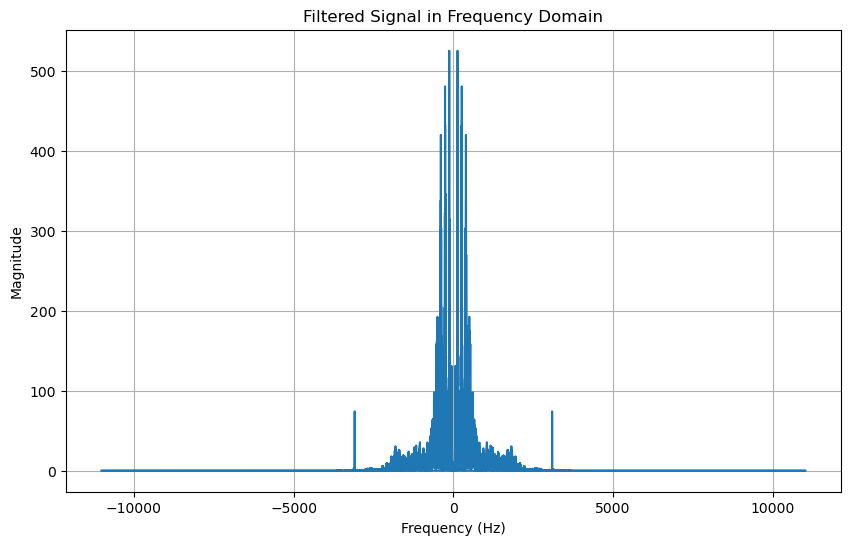

In [ ]:
# Apply a low-pass filter to remove noise if detected
if np.max(y) < noise_threshold:
    print("No significant noise detected. Signal is clean.")
else:
    # Design a low-pass Butterworth filter
    cutoff_freq = 2000  # Cutoff frequency for the low-pass filter
    order = 4  # Order of the Butterworth filter
    normalized_cutoff_freq = cutoff_freq / (sample_rate / 2)
    b, a = butter(order, normalized_cutoff_freq, btype='low', analog=False)
    filtered_audio_data = filtfilt(b, a, y)
    
    # Compute the FFT of the filtered signal
    fft_data = np.fft.fft(filtered_audio_data)
    freq_axis = np.fft.fftfreq(len(fft_data), 1 / sample_rate)
    
    # Plot the filtered signal
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, filtered_audio_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal (Noise Removed)')
    plt.grid(True)
    plt.show()

    # Plot the filtered signal in the frequency domain
    plt.figure(figsize=(10, 6))
    plt.plot(freq_axis, np.abs(fft_data))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Filtered Signal in Frequency Domain')
    plt.grid(True)
    plt.show()

    # Save the filtered audio
    sf.write(r"C:\Amrita\Sem-4\DSP-Lab\new_Proj\Output\filtered21_audio.wav", filtered_audio_data, sr)
